[1] "Valid DNA sequence. Ready for translation"
[1] "MA"
[1] "Valid DNA sequence. Ready for translation"
[1] "IRW"


,sim_id,time,population,lag_time,exp_duration,r_adj,t_death_start,death_rate
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,10,12.77611,67.64072,0.1105793,80,0.1
2,1,1,10,12.77611,67.64072,0.1105793,80,0.1
3,1,2,10,12.77611,67.64072,0.1105793,80,0.1
4,1,3,10,12.77611,67.64072,0.1105793,80,0.1
5,1,4,10,12.77611,67.64072,0.1105793,80,0.1
6,1,5,10,12.77611,67.64072,0.1105793,80,0.1


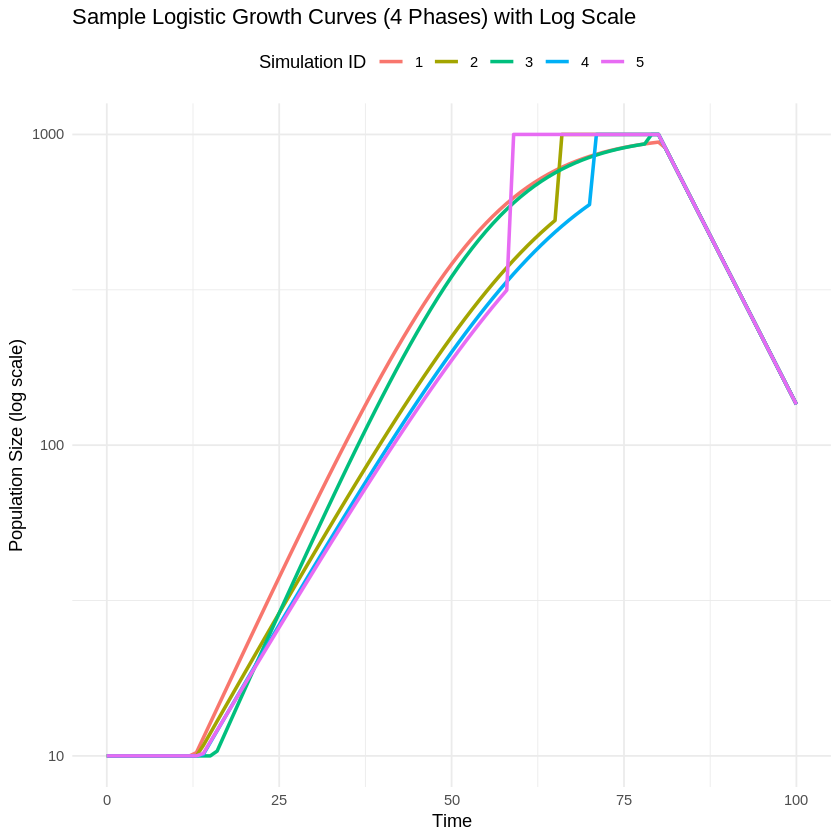

In [ ]:
#Code number 1: translating DNA to protein
traduction <- function(sequence_adn) {
   if (nchar(sequence_adn) %% 3 != 0) {
        stop("ERROR: DNA sequence must have a length multiple of 3 to be translated")
    } else {
      print("Valid DNA sequence. Ready for translation")
    }
    code_genetique <- list(
        'ATA'='I', 'ATC'='I', 'ATT'='I', 'ATG'='M',
        'ACA'='T', 'ACC'='T', 'ACG'='T', 'ACT'='T',
        'AAC'='N', 'AAT'='N', 'AAA'='K', 'AAG'='K',
        'AGC'='S', 'AGT'='S', 'AGA'='R', 'AGG'='R',
        'CTA'='L', 'CTC'='L', 'CTG'='L', 'CTT'='L',
        'CCA'='P', 'CCC'='P', 'CCG'='P', 'CCT'='P',
        'CAC'='H', 'CAT'='H', 'CAA'='Q', 'CAG'='Q',
        'CGA'='R', 'CGC'='R', 'CGG'='R', 'CGT'='R',
        'GTA'='V', 'GTC'='V', 'GTG'='V', 'GTT'='V',
        'GCA'='A', 'GCC'='A', 'GCG'='A', 'GCT'='A',
        'GAC'='D', 'GAT'='D', 'GAA'='E', 'GAG'='E',
        'GGA'='G', 'GGC'='G', 'GGG'='G', 'GGT'='G',
        'TCA'='S', 'TCC'='S', 'TCG'='S', 'TCT'='S',
        'TTC'='F', 'TTT'='F', 'TTA'='L', 'TTG'='L',
        'TAC'='Y', 'TAT'='Y', 'TAA'='*', 'TAG'='*',
        'TGC'='C', 'TGT'='C', 'TGA'='*', 'TGG'='W'
    )
    sequence_proteine <- ""
    for (i in seq(1, nchar(sequence_adn), by=3)) {
        codon <- substr(sequence_adn, i, i+2)
        acide_amines <- code_genetique[[codon]]
        if (is.null(acide_amines)) {
            stop(paste("Codon invalide :", codon))
        }
        sequence_proteine <- paste0(sequence_proteine, acide_amines)
    }

    return(sequence_proteine)
}
#Example 1
sequence_adn <- "ATGGCC"
sequence_proteine <- traduction(sequence_adn)
print(sequence_proteine)
#Example 2
sequence_adn <- "ATCCGTTGG"
sequence_proteine <- traduction(sequence_adn)
print(sequence_proteine)

#Code number 2:  simulating and generating a logistic population growth curve

# Load required packages
library(ggplot2)
library(dplyr)

# Function to simulate a single growth curve with four phases
simulate_full_growth <- function(time_end = 100, dt = 1, K = 1000, r = 0.1, N0 = 10,
                                 lag_range = c(10, 20), exp_range = c(20, 60),
                                 death_phase_fraction = 0.8, death_rate = 0.1) {
  # Randomized parameters:
  lag_time <- runif(1, min = lag_range[1], max = lag_range[2])
  exp_duration <- runif(1, min = exp_range[1], max = exp_range[2])
  t_exponential_end <- lag_time + exp_duration
  t_death_start <- death_phase_fraction * time_end

  # Logistic growth parameter and adjusted growth rate:
  A <- (K - N0) / N0
  r_adj <- r * runif(1, min = 0.8, max = 1.2)

  # Create time sequence
  times <- seq(0, time_end, by = dt)
  pops <- numeric(length(times))

  # Loop through each time point and calculate population size:
  for (i in seq_along(times)) {
    t_val <- times[i]
    if (t_val < lag_time) {
      # Phase 1: Lag phase (population remains constant)
      pop <- N0
    } else if (t_val >= lag_time && t_val < t_exponential_end) {
      # Phase 2: Exponential (log) phase (logistic growth)
      pop <- K / (1 + A * exp(-r_adj * (t_val - lag_time)))
    } else if (t_val >= t_exponential_end && t_val < t_death_start) {
      # Phase 3: Stationary phase (population at carrying capacity)
      pop <- K
    } else {
      # Phase 4: Dead phase (exponential decline)
      pop <- K * exp(-death_rate * (t_val - t_death_start))
    }
    pops[i] <- pop
  }

  # Collect the parameters in a list
  params <- list(lag_time = lag_time,
                 exp_duration = exp_duration,
                 t_exponential_end = t_exponential_end,
                 t_death_start = t_death_start,
                 r_adj = r_adj,
                 death_rate = death_rate)

  return(list(times = times, pops = pops, params = params))
}

# Function to generate multiple growth curves and compile them into a data frame
generate_growth_curves <- function(n_curves = 100, time_end = 100, dt = 0.5, K = 1000, r = 0.1, N0 = 10,
                                   lag_range = c(10, 20), exp_range = c(30, 70),
                                   death_phase_fraction = 0.8, death_rate = 0.1) {
  all_data <- data.frame()

  for (sim_id in 1:n_curves) {
    sim <- simulate_full_growth(time_end = time_end, dt = dt, K = K, r = r, N0 = N0,
                                lag_range = lag_range, exp_range = exp_range,
                                death_phase_fraction = death_phase_fraction, death_rate = death_rate)
    # Create a data frame for the current simulation:
    sim_data <- data.frame(sim_id = sim_id,
                           time = sim$times,
                           population = sim$pops,
                           lag_time = sim$params$lag_time,
                           exp_duration = sim$params$exp_duration,
                           r_adj = sim$params$r_adj,
                           t_death_start = sim$params$t_death_start,
                           death_rate = sim$params$death_rate)
    # Combine the data
    all_data <- rbind(all_data, sim_data)
  }

  return(all_data)
}

# Generate a data frame with 100 growth curves
df_growth <- generate_growth_curves(n_curves = 100,
                                    time_end = 100,
                                    dt = 1,
                                    K = 1000,
                                    r = 0.1,
                                    N0 = 10,
                                    lag_range = c(10, 20),
                                    exp_range = c(40, 80),
                                    death_phase_fraction = 0.8,
                                    death_rate = 0.1)

# Display the first few rows of the data frame
head(df_growth)

# Plot a few example curves using ggplot2 with a logarithmic y-axis
# We'll plot the first 5 simulation curves
df_subset <- df_growth %>% filter(sim_id %in% 1:5)

ggplot(df_subset, aes(x = time, y = population, color = factor(sim_id))) +
  geom_line(size = 1) +
  scale_y_log10() +
  labs(title = "Sample Logistic Growth Curves (4 Phases) with Log Scale",
       x = "Time",
       y = "Population Size (log scale)",
       color = "Simulation ID") +
  theme_minimal() +
  theme(legend.position = "top")


In [ ]:
# Function to find the nearest value in a vector to a target
find_nearest <- function(target, numbers) {
  # Calculate the absolute differences between each number and the target
  differences <- abs(numbers - target)
  # Identify the index of the minimum difference
  index <- which.min(differences)
  # Return the number from the vector at that index
  return(numbers[index])
}

# Example usage with a sample data frame 'df_growth'
# Assume df_growth is already generated (e.g., using the previous simulation code)

# Calculate target as 80% of the maximum population value
target <- max(df_growth$population) * 0.8

# Find the population value in df_growth that is nearest to the target
nearest <- find_nearest(target, df_growth$population)
cat("The number closest to", target, "is", nearest, "\n")

# Extract the time point(s) where the population is equal to the nearest value.
# (There might be multiple time points if the same value occurs more than once.)
time_at_nearest <- df_growth$time[df_growth$population == nearest]

cat("The time when the growth reaches approximately 80% is:", time_at_nearest, "\n")


The number closest to 800 is 799.8499 
The time when the growth reaches approximately 80% is: 66 


In [12]:
hamming_distance <- function(string1, string2) {
  # Convert both strings to uppercase
  string1 <- toupper(string1)
  string2 <- toupper(string2)

  # Determine the maximum length of both strings
  max_length <- max(nchar(string1), nchar(string2))

  # Pad the strings on the right with spaces if necessary
  pad_right <- function(s, target_length) {
    s_len <- nchar(s)
    if (s_len < target_length) {
      s <- paste0(s, strrep(" ", target_length - s_len))
    }
    return(s)
  }

  string1_padded <- pad_right(string1, max_length)
  string2_padded <- pad_right(string2, max_length)

  score <- 0

  # Loop through each character index and compare
  for (i in seq_len(max_length)) {
    char1 <- substr(string1_padded, i, i)
    char2 <- substr(string2_padded, i, i)

    if (char1 == char2) {
      cat(sprintf("Match at index %d: %s\n", i , char1))
      score <- score + 1
    } else {
      cat(sprintf("No Match at index %d: %s\n", i , char1))
    }
  }

  cat(sprintf("The score is %d\n", score))
  return(list(score = score, string1 = string1_padded, string2 = string2_padded))
}

# Example usage:
string1 <- "ANDIRFIGOEWREDROFlkjhgfcdesisa"
string2 <- "AERTHJHGWSDFGBHNBuiwy itehrejowerewqewserg"

result <- hamming_distance(string1, string2)
print(result)


Match at index 1: A
No Match at index 2: N
No Match at index 3: D
No Match at index 4: I
No Match at index 5: R
No Match at index 6: F
No Match at index 7: I
Match at index 8: G
No Match at index 9: O
No Match at index 10: E
No Match at index 11: W
No Match at index 12: R
No Match at index 13: E
No Match at index 14: D
No Match at index 15: R
No Match at index 16: O
No Match at index 17: F
No Match at index 18: L
No Match at index 19: K
No Match at index 20: J
No Match at index 21: H
No Match at index 22: G
No Match at index 23: F
No Match at index 24: C
No Match at index 25: D
No Match at index 26: E
No Match at index 27: S
No Match at index 28: I
No Match at index 29: S
No Match at index 30: A
No Match at index 31:  
No Match at index 32:  
No Match at index 33:  
No Match at index 34:  
No Match at index 35:  
No Match at index 36:  
No Match at index 37:  
No Match at index 38:  
No Match at index 39:  
No Match at index 40:  
No Match at index 41:  
No Match at index 42:  
The sco